In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
train_set = pd.read_csv('train.csv')

In [89]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


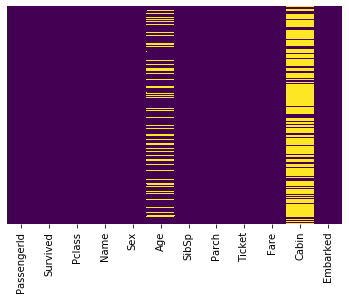

In [91]:
sns.heatmap(train_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

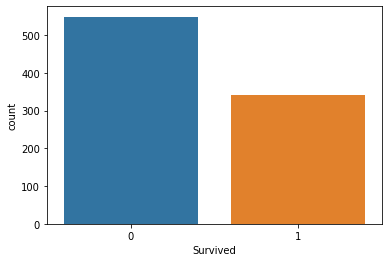

In [92]:
sns.countplot(x='Survived', data= train_set)

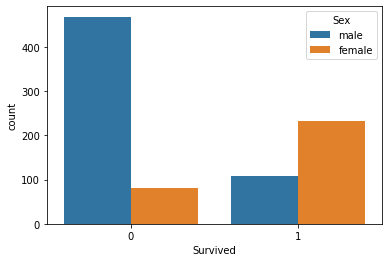

In [93]:
sns.countplot(x='Survived', data= train_set, hue='Sex')

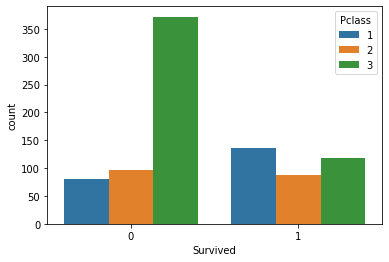

In [94]:
sns.countplot(x='Survived', data= train_set, hue='Pclass')

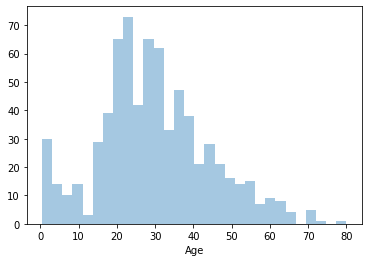

In [95]:
sns.distplot(train_set['Age'].dropna(), kde=False, bins=30)

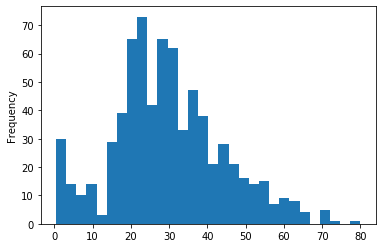

In [96]:
train_set['Age'].plot.hist(bins=30)

In [97]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


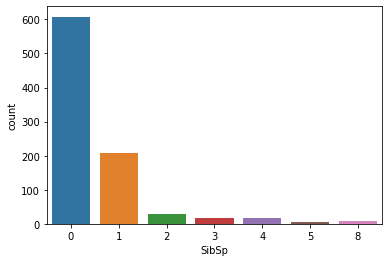

In [98]:
sns.countplot(x='SibSp', data=train_set)

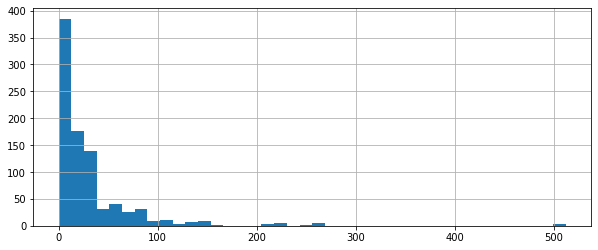

In [99]:
train_set['Fare'].hist(bins=40, figsize=(10,4))

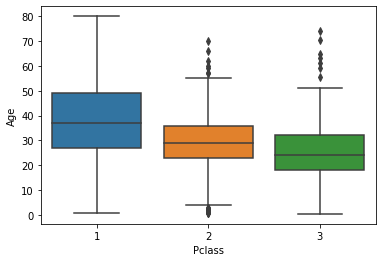

In [100]:
sns.boxplot(x='Pclass', y='Age', data=train_set)

In [51]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [101]:
train_set['Age'] = train_set[['Age', 'Pclass']].apply(impute_age, axis=1)

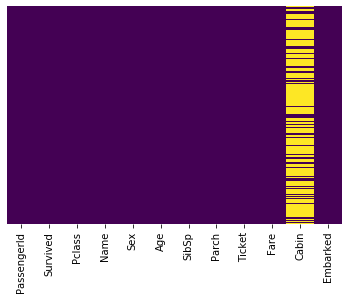

In [102]:
sns.heatmap(train_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [103]:
train_set.drop('Cabin', axis=1, inplace=True)

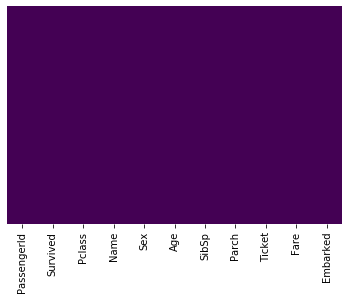

In [104]:
sns.heatmap(train_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [105]:
train_set.dropna(inplace=True)

In [106]:
sex = pd.get_dummies(train_set['Sex'], drop_first=True)

In [107]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [108]:
embark = pd.get_dummies(train_set['Embarked'], drop_first=True)

In [109]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [110]:
train_set = pd.concat([train_set, sex, embark], axis=1)

In [111]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [112]:
train_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [113]:
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [114]:
train_set.drop('PassengerId', axis=1, inplace=True)

In [115]:
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [116]:
X = train_set[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train_set['Survived'] 

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=333)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lrm = LogisticRegression()

In [121]:
lrm.fit(X_train, y_train)

/home/artiom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
pred = lrm.predict(X_test)

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       217
           1       0.74      0.64      0.69       139

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test, pred)

array([[186,  31],
       [ 50,  89]])